# Particle in a box with two finite-potential external walls and a  barrier between them 

### Authors:

* [Vinícius Wilian D. Cruzeiro](https://scholar.google.com/citations?user=iAK04WMAAAAJ). E-mail: vwcruzeiro@ufl.edu
* Xiang Gao. E-mail: qasdfgtyuiop@ufl.edu
* [Valeria D. Kleiman](http://kleiman.chem.ufl.edu/). E-mail: kleiman@ufl.edu

Department of Chemistry

Physical Chemistry Division

University of Florida

P.O. Box 117200

Gainesville, FL 32611-7200

United States

**Instructions:**
* The reader should follow this notebook in the order that it is presented, executing code cells in consecutive order.
* In order to execute a cell you may click on the cell and click the *PLAY* button, press *Shift+Enter*, or got to *Cell-->Run cells*. The user may also execute all cells at once by clicking on *Cell --> Run All* at the toolbar above. 
* **Important:** Some cells **are only going to execute after the user enters input values in the corresponding boxes**.

In [1]:
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading. As you scroll through code cell,
they appear as empty cells
with a blue right-side edge
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

### Libraries used in this notebook:

On the next cell we are going to import the libraries used in this notebook as well as call some important functions.

In [3]:
import matplotlib as mpl # matplotlib library for plotting and visualization
import matplotlib.pylab as plt # matplotlib library for plotting and visualization
import numpy as np #numpy library for numerical manipulation, especially suited for data arrays
from IPython.display import HTML # Importing function necessary to display the animation videos on the screen

In the next cell we are shutting down eventual warnings displayed by IPython. This cell is optional.

In [4]:
import warnings
warnings.filterwarnings('ignore')

Executing the next cell prints on the screen the versions of IPython, Python and its libraries on your computer. Please check if the versions are up-to-date to facilitate a smooth running of the program.

In [5]:
import sys # checking the version of Python
import IPython # checking the version of IPython
print("Python version = {}".format(sys.version))
print("IPython version = {}".format(IPython.__version__))
print("Matplotlib version = {}".format(plt.__version__))
print("Numpy version = {}".format(np.__version__))

Python version = 2.7.12 (default, Jul  1 2016, 15:12:24) 
[GCC 5.4.0 20160609]
IPython version = 5.1.0
Matplotlib version = 1.11.1
Numpy version = 1.11.1


### Special calls:

The next cell configures `matplotlib` to show figures embedded within the cells it was executed from, instead of opening a new window for each figure.

In [6]:
%matplotlib inline

## Approaching the problem

We can extend the calculations for the particle in a finite potential box (presented in a previous notebook) and apply it to a particle contained within two boxes intermediated by a barrier, all with independent finite potentials.   In this problem, not only the height of the potentials is important, but the distance between them is critical to the understanding of the behavior of hte particle.

This is the potential $V(x)$ we are going to consider:

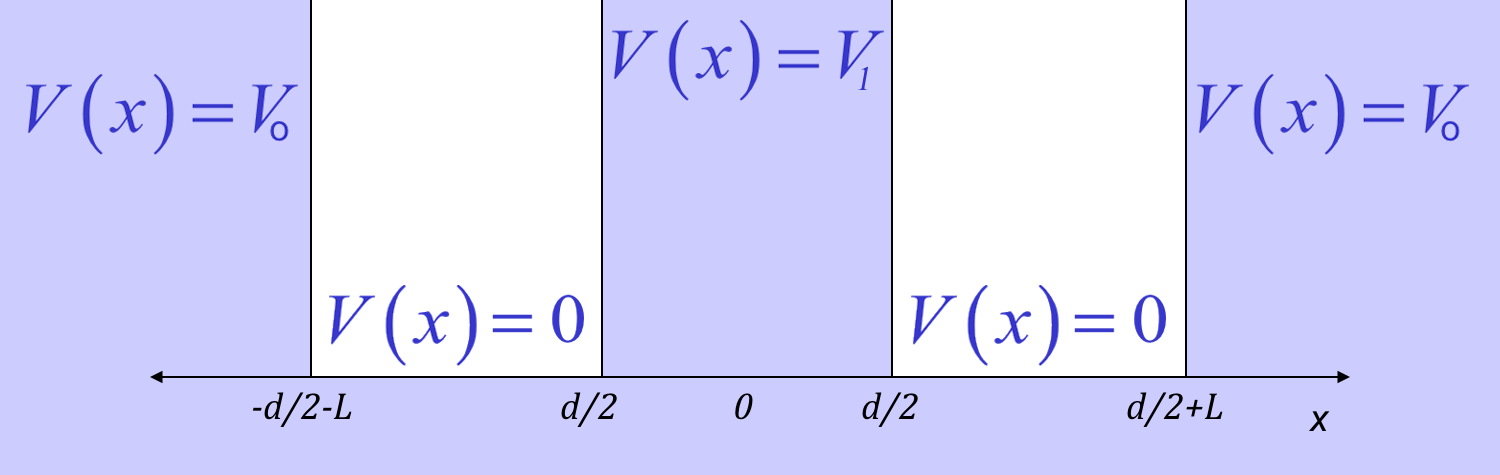

In [7]:
from IPython.display import Image
Image(filename='particle_in_two_finite_boxes_diagram.png')

Or mathematically:

$V(x) =
\left\{
	\begin{array}{lll}
       I:   &  V_o  & \; \mbox{if }  \; x \leq -\left(\frac{d}{2}+ L \right) \\
       II:  & 0    & \; \mbox{if}\; -\left(\frac{d}{2} +L\right) \leq  x  \leq -\frac{d}{2} \\
	   III: & V_1  & \; \mbox{if }\; -\frac{d}{2} \leq x \leq \frac{d}{2} \\
	   IV:  &  0    & \; \mbox{if } \;\frac{d}{2} \leq x \leq \frac{d}{2}+L \\
	   V:  & V_o  & \; \mbox{if }  \; x \geq \frac{d}{2}+ L
	\end{array}
\right.$

For simplicity, **we will only consider the case in which $V_1 \geq V_o$**.

As it was the case for a single box, the interesting situation is when $E \leq V_o$ and we look for the bound states. For energies larger than $V_o$ and $V_1$ the particle will be free.

Since the potential is even $[V(-x) = V(x)]$, the wavefunctions can be choosen to be even [$\psi(-x) = \psi(x)$] or odd $[\psi(-x) = -\psi(x)]$. Applying the first constrain, in which we consider that the wavefunctions must be finite, leads to the solutions for the Schrödinger equation for $E \leq V_o$ (bounded states) as:

**Solutions: $\psi(x) = \pm \psi(-x)$**
$$\begin{array} {lll}
\mbox{For }  I:   & \psi(x) = \pm\; De^{\alpha_o x} \\
\mbox{For }  II:  & \psi(x) = \pm \left[B\cos(kx) + C\sin(kx)\right] \\
\mbox{For }  III: & \psi(x) = A\left(e^{\alpha_1 x}\pm e^{-\alpha_1 x}\right) \\
\mbox{For }  IV:  & \psi(x) = B\cos(kx) + C\sin(kx) \\
\mbox{For }  V:   & \psi(x) = De^{-\alpha_o x} \\
\end{array}  \tag{1}$$

where the $\pm $ corresponds to the even or odd solutions, respectively. As before, the wavefunctions and their first derivatives must be continuous.   In addition, at the boundaries between regions, the wavefucntions must have the same value.


After imposing the continuity and boundary conditions we reach the following relation for the allowed energy values:

**Even solutions:** 
$$\frac{\alpha_1\tanh\left(\alpha_1\frac{d}{2}\right)+k\tan\left(k\frac{d}{2}\right)}{k-\alpha_1\tanh\left(\alpha_1\frac{d}{2}\right)\tan\left(k\frac{d}{2}\right)}=\frac{-\alpha_o+k\tan\left[k\left(\frac{d}{2}+L\right)\right]}{k+\alpha_o\tan\left[k\left(\frac{d}{2}+L\right)\right]}  \tag{2}$$



**Odd solutions:** 

$$\frac{k\tanh\left(\alpha_1\frac{d}{2}\right)-\alpha_1\tan\left(k\frac{d}{2}\right)}{\alpha_1+k\tanh\left(\alpha_1\frac{d}{2}\right)\tan\left(k\frac{d}{2}\right)}=\frac{k+\alpha_o\tan\left[k\left(\frac{d}{2}+L\right)\right]}{-\alpha_o+k\tan\left[k\left(\frac{d}{2}+L\right)\right]}  \tag{3}$$

where:

$$\alpha_o = \frac{\sqrt{2m(V_o-E)}}{\hbar} \hspace 3cm \alpha_1 = \frac{\sqrt{2m(V_1-E)}}{\hbar} \hspace 3cm k = \frac{\sqrt{2mE}}{\hbar}$$

The allowed solutions will be those corresponding to energies that obey equations 2 and 3.
Once we find the allowed energies, we can go back and obtain the wavefunctions with the proper coefficients. 

## Finding the allowed Energies graphically 

Enter the value for Vo (in eV) = 8
Enter the value for L (box size, in Angstroms) = 10
Enter the value for V1 (V1 >= Vo, in eV) = 8
Enter the value for d (barrier size, in Angstroms) = 1


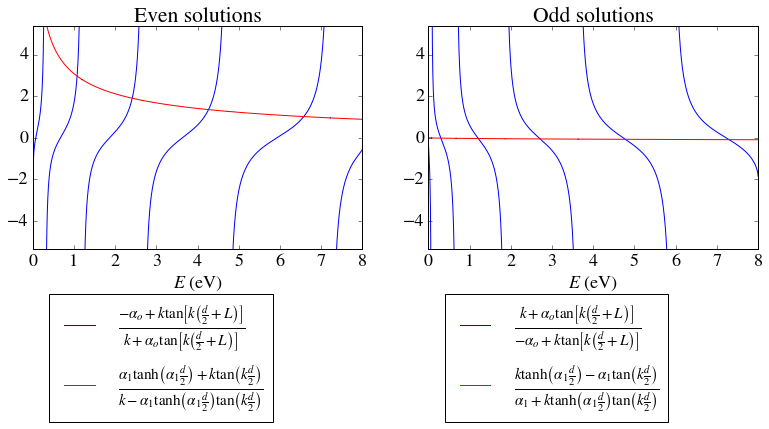

In [39]:
# Reading the input variables from the user and making sure V1 > Vo
Vo = abs(float(input("Enter the value for Vo (in eV) = ")))
L = abs(float(input("Enter the value for L (box size, in Angstroms) = ")))
V1 = 0.9*Vo
while(V1<Vo):
    V1 = float(input("Enter the value for V1 (V1 >= Vo, in eV) = "))
    if(V1<Vo):
        print ("V1 cannot be higher than Vo. Please enter the value for V1 again.\n")
d = abs(float(input("Enter the value for d (barrier size, in Angstroms) = ")))

val = np.sqrt(2.0*9.10938356e-31*1.60217662e-19)*1e-10/(1.05457180013e-34) 
# equal to sqrt(2m_e (kg)* (Joules/eV)* 1 (m/A)/hbar (in J.sec)

# Defining functions that come from the energy expression
def f0(E):
    var = -np.sqrt(Vo-E)+np.sqrt(E)*np.tan(np.sqrt(E)*val*(d/2.0+L))
    var = var/(np.sqrt(E)+np.sqrt(Vo-E)*np.tan(np.sqrt(E)*val*(d/2.0+L)))
    return var

def f1(E):
    var = np.sqrt(V1-E)*np.tanh(d*np.sqrt(V1-E)*val/2.0)+np.sqrt(E)*np.tan(d*np.sqrt(E)*val/2.0)
    var = var/(np.sqrt(E)-np.sqrt(V1-E)*np.tanh(d*np.sqrt(V1-E)*val/2.0)*np.tan(d*np.sqrt(E)*val/2.0))
    return var

def f2(E):
    var = np.sqrt(E)+np.sqrt(Vo-E)*np.tan(np.sqrt(E)*val*(d/2.0+L))
    var = var/(np.sqrt(E)*np.tan(np.sqrt(E)*val*(d/2.0+L))-np.sqrt(Vo-E))
    return var

def f3(E):
    var = np.sqrt(E)*np.tanh(d*np.sqrt(V1-E)*val/2.0)-np.sqrt(V1-E)*np.tan(d*np.sqrt(E)*val/2.0)
    var = var/(np.sqrt(V1-E)+np.sqrt(E)*np.tanh(d*np.sqrt(V1-E)*val/2.0)*np.tan(d*np.sqrt(E)*val/2.0))
    return var

# Defining maximum values to be displayed on the y axes
maxval = 0.0
for n in range(10):
    if (abs(f1(n*Vo/10.0))>maxval and abs(f1(n*Vo/10.0))!=float('inf')): maxval = abs(f1(n*Vo/10.0))
if (np.sqrt(Vo)*1.9>maxval):
    ymax1 = 1.9*np.sqrt(Vo)
else:
    ymax1 = maxval
maxval = 0.0
for n in range(10):
    if (abs(f3(n*Vo/10.0))>maxval and abs(f3(n*Vo/10.0))!=float('inf')): maxval = abs(f3(n*Vo/10.0))
if (np.sqrt(Vo)*1.9>maxval):
    ymax2 = 1.9*np.sqrt(Vo)
else:
    ymax2 = maxval

# Generating the wavefunction graph
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
fig, axes = plt.subplots(1, 2, figsize=(13,4))
axes[0].axis([0.0,Vo,-ymax1,ymax1])
axes[0].set_xlabel(r'$E$ (eV)')
axes[0].set_ylabel(r'')
axes[0].set_title('Even solutions')
axes[1].axis([0.0,Vo,-ymax2,ymax2])
axes[1].set_xlabel(r'$E$ (eV)')
axes[1].set_ylabel(r'')
axes[1].set_title('Odd solutions')
E_even = np.linspace(0.0, Vo, 100000)
E_odd = np.linspace(0.0, Vo, 100000)
# Removing discontinuity points
for n in range(100000):
    if abs(np.sqrt(E_even[n])+np.sqrt(Vo-E_even[n])*np.tan(np.sqrt(E_even[n])*val*(d/2.0+L)))<0.01: E_even[n] = np.nan
    if abs(np.sqrt(E_even[n])-np.sqrt(V1-E_even[n])*np.tanh(d*np.sqrt(V1-E_even[n])*val/2.0)*np.tan(d*np.sqrt(E_even[n])*val/2.0))<0.01: E_even[n] = np.nan
    if abs(np.sqrt(E_odd[n])*np.tan(np.sqrt(E_odd[n])*val*(d/2.0+L))-np.sqrt(Vo-E_odd[n]))<0.01: E_odd[n] = np.nan
    if abs(np.sqrt(V1-E_odd[n])+np.sqrt(E_odd[n])*np.tanh(d*np.sqrt(V1-E_odd[n])*val/2.0)*np.tan(d*np.sqrt(E_odd[n])*val/2.0))<0.01: E_odd[n] = np.nan
# Plotting the curves and setting the labelsaxes[0].plot(E_even, f0(E_even), label=r"$\frac{-\alpha_o+k\tan\left[k\left(\frac{d}{2}+a\right)\right]}{k+\alpha_o\tan\left[k\left(\frac{d}{2}+a\right)\right]}$", color="blue")
axes[0].plot(E_even, f0(E_even), label=r"$\frac{-\alpha_o+k\tan\left[k\left(\frac{d}{2}+L\right)\right]}{k+\alpha_o\tan\left[k\left(\frac{d}{2}+L\right)\right]}$", color="blue")
axes[0].plot(E_even, f1(E_even), label=r"$\frac{\alpha_1\tanh\left(\alpha_1\frac{d}{2}\right)+k\tan\left(k\frac{d}{2}\right)}{k-\alpha_1\tanh\left(\alpha_1\frac{d}{2}\right)\tan\left(k\frac{d}{2}\right)}$", color="red")
axes[1].plot(E_odd,  f2(E_odd),  label=r"$\frac{k+\alpha_o\tan\left[k\left(\frac{d}{2}+L\right)\right]}{-\alpha_o+k\tan\left[k\left(\frac{d}{2}+L\right)\right]}$", color="blue")
axes[1].plot(E_odd,  f3(E_odd),  label=r"$\frac{k\tanh\left(\alpha_1\frac{d}{2}\right)-\alpha_1\tan\left(k\frac{d}{2}\right)}{\alpha_1+k\tanh\left(\alpha_1\frac{d}{2}\right)\tan\left(k\frac{d}{2}\right)}$", color="red")
# Chosing the positions of the legends
axes[0].legend(bbox_to_anchor=(0.05, -0.2), loc=2, borderaxespad=0.0)
axes[1].legend(bbox_to_anchor=(0.05, -0.2), loc=2, borderaxespad=0.0)

# Show the plots on the screen once the code reaches this point
plt.show()

The allowed values would then be the values of $E$ in which the two curves cross.
Here are some question to think about:
* **Q1:** How many bound states are possible?
* **Q2:** How many bound states are even and how many are odd?
* **Q3:** Is the ground state described by an even or an odd wavefunction?
* **Q4:** Can you read accuretely the allowed values of energy from these graphs?

The allowed values of $E$ can be found numerically, yielding:

In [40]:
print ("The allowed bounded energies are:")
# We want to find the values of E in which f_even and f_odd are zero
f_even = lambda E : f0(E)-f1(E)
f_odd = lambda E : f2(E)-f3(E)
E_old = 0.0
f_even_old = f_even(0.0)
f_odd_old = f_odd(0.0)
n_even = 1
n_odd = 1
E_vals = np.zeros(999)
n = 1
# Here we loop from E = 0 to E = Vo seeking roots
for E in np.linspace(0.0, Vo, 200000):
    f_even_now = f_even(E)
    # If the difference is zero or if it changes sign then we might have passed through a root
    if (f_even_now == 0.0 or f_even_now/f_even_old < 0.0):
        # If the old values of f are not close to zero, this means we didn't pass through a root but
        # through a discontinuity point
        if (abs(f_even_now)<1.0 and abs(f_even_old)<1.0):
            E_vals[n-1] = (E+E_old)/2.0
            print ("  State #%3d (Even wavefunction): %9.4f eV, %13.6g J" % (n,E_vals[n-1],E_vals[n-1]*1.60217662e-19))
            n += 1
            n_even += 1
    f_odd_now = f_odd(E)
    # If the difference is zero or if it changes sign then we might have passed through a root
    if (f_odd_now == 0.0 or f_odd_now/f_odd_old < 0.0) and (E>0.0):
        # If the old values of f are not close to zero, this means we didn't pass through a root but
        # through a discontinuity point
        if (abs(f_odd_now)<1.0 and abs(f_odd_old)<1.0):
            E_vals[n-1] = (E+E_old)/2.0
            print ("  State #%3d  (Odd wavefunction): %9.4f eV, %13.6g J" % (n,E_vals[n-1],E_vals[n-1]*1.60217662e-19))
            n += 1
            n_odd += 1
    E_old = E
    f_even_old = f_even_now
    f_odd_old = f_odd_now
nstates = n-1
print ("\nTHERE ARE %3d POSSIBLE BOUNDED ENERGIES" % nstates)

The allowed bounded energies are:
  State #  1 (Even wavefunction):    0.2697 eV,   4.32173e-20 J
  State #  2  (Odd wavefunction):    0.3040 eV,   4.87032e-20 J
  State #  3 (Even wavefunction):    1.0769 eV,   1.72533e-19 J
  State #  4  (Odd wavefunction):    1.2126 eV,   1.94284e-19 J
  State #  5 (Even wavefunction):    2.4145 eV,   3.86847e-19 J
  State #  6  (Odd wavefunction):    2.7144 eV,   4.34887e-19 J
  State #  7 (Even wavefunction):    4.2662 eV,   6.83521e-19 J
  State #  8  (Odd wavefunction):    4.7797 eV,    7.6579e-19 J
  State #  9 (Even wavefunction):    6.5771 eV,   1.05376e-18 J
  State # 10  (Odd wavefunction):    7.2976 eV,   1.16921e-18 J

THERE ARE  10 POSSIBLE BOUNDED ENERGIES


Since the lowest energy corresponds to the even solution of the wavefunction, and the states are labeled by their  quantum number $(n=1,2...n_{max})$, the even solutions will correspond to odd quantum numbers and the odd solutions will correspond to even quantum numbers.  

**Plotting an Energy Diagram helps us to see the energy separation between the states.**

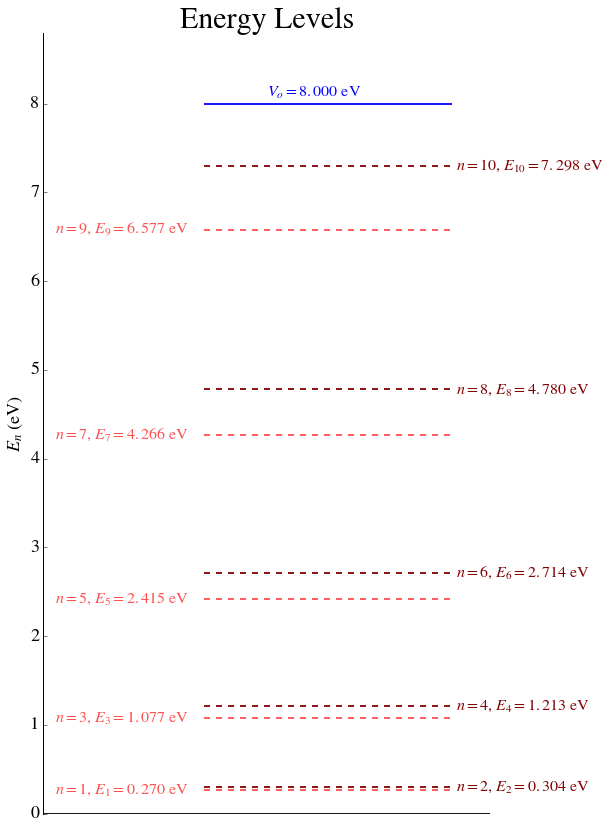

In [41]:
# Generating the energy diagram
fig, ax = plt.subplots(figsize=(8,14))
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_color('none')
ax.axes.get_xaxis().set_visible(False)
ax.spines['top'].set_color('none')
ax.axis([0.0,20.0,0.0,1.1*Vo])
ax.set_ylabel(r'$E_n$ (eV)')
for n in range(1,nstates+1):
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(E_vals[n-1])
    if(n%2==1):
        ax.text(0.5, E_vals[n-1]-0.005*Vo, str1, fontsize=16, color="#ff4d4d")
        ax.hlines(E_vals[n-1], 7.2, 18.3, linewidth=1.8, linestyle='--', color="#ff4d4d")
    else:
        ax.text(18.5, E_vals[n-1]-0.005*Vo, str1, fontsize=16, color="#800000")
        ax.hlines(E_vals[n-1], 7.2, 18.3, linewidth=1.8, linestyle='--', color="#800000")
str1="$V_o = %.3f$ eV"%(Vo)
#ax.text(18.5, Vo-0.01*Vo, str1, fontsize=16, color="blue")
ax.text(10, Vo+0.01*Vo, str1, fontsize=16, color="blue")
ax.hlines(Vo, 7.2, 18.3, linewidth=1.8, linestyle='-', color="blue")
ax.hlines(0.0, 0.0, 20.0, linewidth=1.8, linestyle='-', color="black")
plt.title("Energy Levels", fontsize=30)
plt.show()

We can now plug the values of $E$ back into the wavefunction expressions and plot the **wavefunctions** and the corresponding **probability densities**.


The Wavefunctions are:


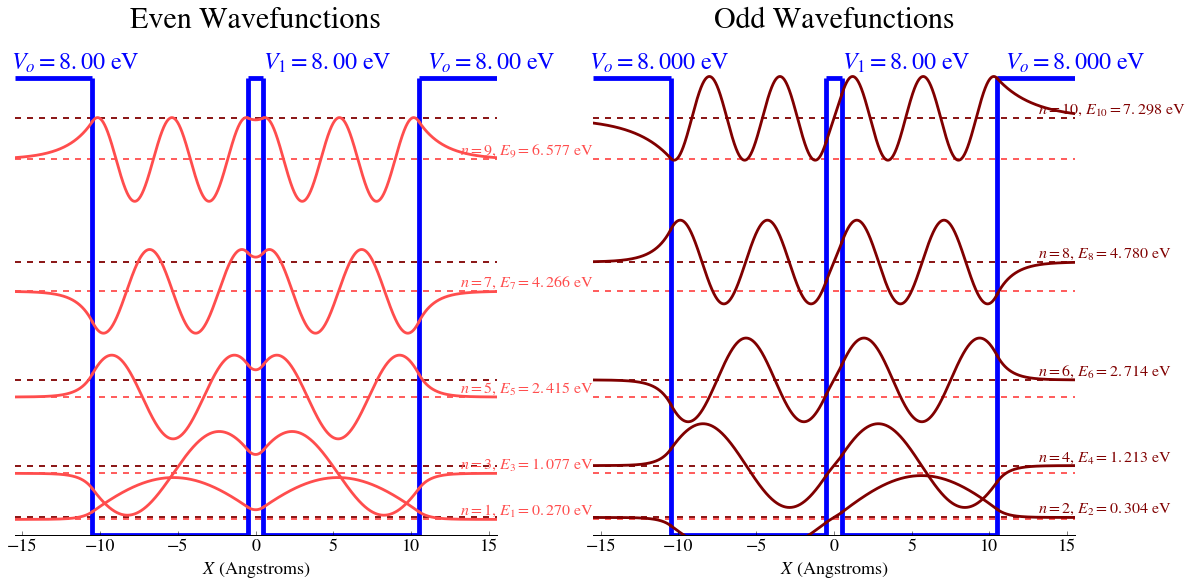

In [42]:
print ("\nThe Wavefunctions are:")

# Drawing the backgroung graph
fig, axes = plt.subplots(1, 2, figsize=(19,9))
axes[0].spines['right'].set_color('none')
axes[0].xaxis.tick_bottom()
axes[0].spines['left'].set_color('none')
axes[0].axes.get_yaxis().set_visible(False)
axes[0].spines['top'].set_color('none')

if (V1 > 1.4*Vo):  
    Ymax=1.4*Vo
else:
    Ymax=1.1*V1
axes[0].axis([-1.5*L-d/2.0,1.5*L+d/2.0,0.0,Ymax])
axes[0].set_xlabel(r'$X$ (Angstroms)')
str1="$V_o = %.2f$ eV"%(Vo)
str2="$V_1 = %.2f$ eV"%(V1)
axes[0].text(1.05*(L+d/2.0), 1.02*Vo, str1, fontsize=24, color="blue")
axes[0].text(-1.5*(L+d/2.0), 1.02*Vo, str1, fontsize=24, color="blue")
if(d>0.0): axes[0].text(d/2, 1.02*Vo, str2, fontsize=24, color="blue")
# Defining the maximum amplitude of the wavefunction
if ((E_vals[1]-E_vals[0])/(E_vals[2]-E_vals[0]) < 0.2):
    amp = np.sqrt((E_vals[2]-E_vals[0])/1.5)
else:
    amp = np.sqrt((E_vals[1]-E_vals[0])/1.5)
# Plotting the energy levels
for n in range(1,nstates+1):
    # Odd solution
    if (n%2==0): axes[0].hlines(E_vals[n-1], -1.5*L-d/2.0, 1.5*L+d/2.0, linewidth=1.8, linestyle='--', color="#800000")
    # Even solution
    if (n%2==1): axes[0].hlines(E_vals[n-1], -1.5*L-d/2.0, 1.5*L+d/2.0, linewidth=1.8, linestyle='--', color="#ff4d4d")
axes[0].margins(0.00)
axes[0].vlines(-L-d/2.0, 0.0, Vo, linewidth=4.8, color="blue")
if(d>0.0):
    axes[0].vlines(-d/2.0, 0.0, V1, linewidth=4.8, color="blue")
    axes[0].vlines(d/2.0, 0.0, V1, linewidth=4.8, color="blue")
axes[0].vlines(L+d/2.0, 0.0, Vo, linewidth=4.8, color="blue")
axes[0].hlines(Vo, -1.5*L-d/2.0, -L-d/2.0, linewidth=4.8, color="blue")
axes[0].hlines(0.0, -L-d/2.0, -d/2.0, linewidth=4.8, color="blue")
axes[0].hlines(V1, -d/2.0, d/2.0, linewidth=4.8, color="blue")
axes[0].hlines(0.0, d/2.0, L+d/2.0, linewidth=4.8, color="blue")
axes[0].hlines(Vo, L+d/2.0, 1.5*L+d/2.0, linewidth=4.8, color="blue")
axes[0].set_title('Even Wavefunctions', fontsize=30)

# Defining the X ranges
X_lef2 = np.linspace(-1.5*L-d/2.0, -L-d/2.0, 900,endpoint=True)
X_lef1 = np.linspace(-L-d/2.0, -d/2.0, 900,endpoint=True)
X_mid = np.linspace(-d/2.0, d/2.0, 900,endpoint=True)
X_rig1 = np.linspace(d/2.0, L+d/2.0, 900,endpoint=True)
X_rig2 = np.linspace(L+d/2.0, 1.5*L+d/2.0, 900,endpoint=True)

# Plotting the  wavefunctions
for n in range(1,nstates+1):
    k = np.sqrt(E_vals[n-1])*val
    a0 = np.sqrt(Vo-E_vals[n-1])*val
    a1 = np.sqrt(V1-E_vals[n-1])*val
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(E_vals[n-1])
    # Even solution wavefunctions
    if (n%2==1):
        B = amp/np.sqrt(f1(E_vals[n-1])*f1(E_vals[n-1])+1.0)
        C = f1(E_vals[n-1])*B
        A = (B*np.cos(k*d/2.0)+C*np.sin(k*d/2.0))/(np.exp(-a1*d/2.0)+np.exp(a1*d/2.0))
        D = np.exp(a0*(L+d/2.0))*(B*np.cos(k*(L+d/2.0))+C*np.sin(k*(L+d/2.0)))
        axes[0].plot(X_lef2, E_vals[n-1]+D*np.exp(a0*X_lef2), color="#ff4d4d", label="", linewidth=2.8)
        axes[0].plot(X_lef1, E_vals[n-1]+B*np.cos(k*X_lef1)-C*np.sin(k*X_lef1), color="#ff4d4d", label="", linewidth=2.8)
        axes[0].plot(X_mid,  E_vals[n-1]+A*(np.exp(-a1*X_mid)+np.exp(a1*X_mid)), color="#ff4d4d", label="", linewidth=2.8)
        axes[0].plot(X_rig1, E_vals[n-1]+B*np.cos(k*X_rig1)+C*np.sin(k*X_rig1), color="#ff4d4d", label="", linewidth=2.8)
        axes[0].plot(X_rig2, E_vals[n-1]+D*np.exp(-a0*X_rig2), color="#ff4d4d", label="", linewidth=2.8)
        axes[0].text(1.25*(L+d/2.0), E_vals[n-1]+0.01*Vo, str1, fontsize=16, color="#ff4d4d")
    
# Drawing the backgroung graph
axes[1].spines['right'].set_color('none')
axes[1].xaxis.tick_bottom()
axes[1].spines['left'].set_color('none')
axes[1].axes.get_yaxis().set_visible(False)
axes[1].spines['top'].set_color('none')
axes[1].axis([-1.5*L-d/2.0,1.5*L+d/2.0,0.0,Ymax])
axes[1].set_xlabel(r'$X$ (Angstroms)')
str1="$V_o = %.3f$ eV"%(Vo)
str11="$V_1= %.3f$ eV"% (V1)
axes[1].text(1.05*(L+d/2.0), 1.02*Vo, str1, fontsize=24, color="blue")
axes[1].text(-1.5*(L+d/2.0), 1.02*Vo, str1, fontsize=24, color="blue")
if(d>0.0): axes[1].text(d/2, 1.02*Vo, str2, fontsize=24, color="blue")
# Defining the maximum amplitude of the wavefunction
if ((E_vals[1]-E_vals[0])/(E_vals[2]-E_vals[0]) < 0.2):
    amp = np.sqrt((E_vals[2]-E_vals[0])/1.5)
else:
    amp = np.sqrt((E_vals[1]-E_vals[0])/1.5)
# Plotting the energy levels
for n in range(1,nstates+1):
    # Odd solution
    if (n%2==0): axes[1].hlines(E_vals[n-1], -1.5*L-d/2.0, 1.5*L+d/2.0, linewidth=1.8, linestyle='--', color="#800000")
    # Even solution
    if (n%2==1): axes[1].hlines(E_vals[n-1], -1.5*L-d/2.0, 1.5*L+d/2.0, linewidth=1.8, linestyle='--', color="#ff4d4d")
    ax.margins(0.00)            
axes[1].vlines(-L-d/2.0, 0.0, Vo, linewidth=4.8, color="blue")
if(d>0.0):
    axes[1].vlines(-d/2.0, 0.0, V1, linewidth=4.8, color="blue")
    axes[1].vlines(d/2.0, 0.0, V1, linewidth=4.8, color="blue")
axes[1].vlines(L+d/2.0, 0.0, Vo, linewidth=4.8, color="blue")
axes[1].hlines(Vo, -1.5*L-d/2.0, -L-d/2.0, linewidth=4.8, color="blue")
axes[1].hlines(0.0, -L-d/2.0, -d/2.0, linewidth=4.8, color="blue")
axes[1].hlines(V1, -d/2.0, d/2.0, linewidth=4.8, color="blue")
axes[1].hlines(0.0, d/2.0, L+d/2.0, linewidth=4.8, color="blue")
axes[1].hlines(Vo, L+d/2.0, 1.5*L+d/2.0, linewidth=4.8, color="blue")
axes[1].set_title('Odd Wavefunctions', fontsize=30)

# Defining the X ranges
X_lef2 = np.linspace(-1.5*L-d/2.0, -L-d/2.0, 900,endpoint=True)
X_lef1 = np.linspace(-L-d/2.0, -d/2.0, 900,endpoint=True)
X_mid = np.linspace(-d/2.0, d/2.0, 900,endpoint=True)
X_rig1 = np.linspace(d/2.0, L+d/2.0, 900,endpoint=True)
X_rig2 = np.linspace(L+d/2.0, 1.5*L+d/2.0, 900,endpoint=True)

# Plotting the wavefunctions
for n in range(1,nstates+1):
    k = np.sqrt(E_vals[n-1])*val
    a0 = np.sqrt(Vo-E_vals[n-1])*val
    a1 = np.sqrt(V1-E_vals[n-1])*val
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(E_vals[n-1])
    # Odd solution 
    if (n%2==0):
        C = amp/np.sqrt(f3(E_vals[n-1])*f3(E_vals[n-1])+1.0)
        B = f3(E_vals[n-1])*C
        A = (B*np.cos(k*d/2.0)+C*np.sin(k*d/2.0))/(-np.exp(-a1*d/2.0)+np.exp(a1*d/2.0))
        D = np.exp(a0*(L+d/2.0))*(B*np.cos(k*(L+d/2.0))+C*np.sin(k*(L+d/2.0)))
        axes[1].plot(X_lef2, E_vals[n-1]-D*np.exp(a0*X_lef2), color="#800000", label="", linewidth=2.8)
        axes[1].plot(X_lef1, E_vals[n-1]-B*np.cos(k*X_lef1)+C*np.sin(k*X_lef1), color="#800000", label="", linewidth=2.8)
        axes[1].plot(X_mid,  E_vals[n-1]+A*(-np.exp(-a1*X_mid)+np.exp(a1*X_mid)), color="#800000", label="", linewidth=2.8)
        axes[1].plot(X_rig1, E_vals[n-1]+B*np.cos(k*X_rig1)+C*np.sin(k*X_rig1), color="#800000", label="", linewidth=2.8)
        axes[1].plot(X_rig2, E_vals[n-1]+D*np.exp(-a0*X_rig2), color="#800000", label="", linewidth=2.8)
        axes[1].text(1.25*(L+d/2.0), E_vals[n-1]+0.01*Vo, str1, fontsize=16, color="#800000")
    
plt.show()

The even wavefunctions maintain the numbers of nodes as in the separate boxes, while the odd solutions have an additional node at the center of the barrier.  Since the lowest energy corresponds to the even solution of the wavefunction, and the states are labeled by their quantum number (n=1,2...nmax), the even solutions will correspond to odd quantum numbers and the odd solutions will correspond to even quantum numbers.  



The Probability Densities are:


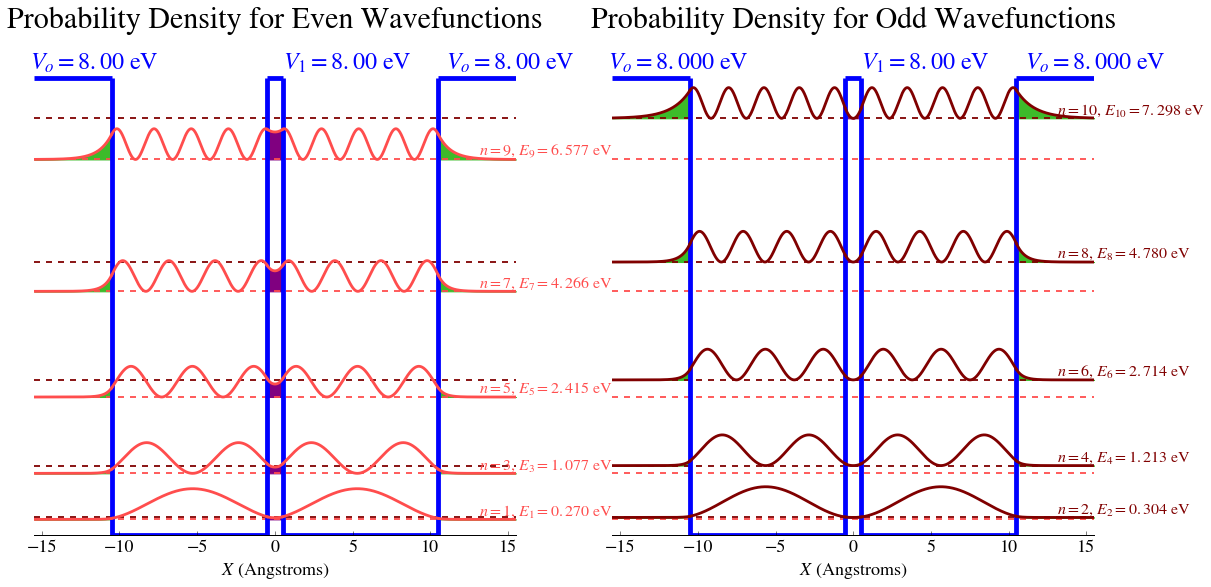

In [43]:
print ("\nThe Probability Densities are:")

# Drawing the backgroung graph
fig, axes = plt.subplots(1, 2, figsize=(19,9))
axes[0].spines['right'].set_color('none')
axes[0].xaxis.tick_bottom()
axes[0].spines['left'].set_color('none')
axes[0].axes.get_yaxis().set_visible(False)
axes[0].spines['top'].set_color('none')

if (V1 > 1.4*Vo):  
    Ymax=1.4*Vo
else:
    Ymax=1.1*V1
axes[0].axis([-1.5*L-d/2.0,1.5*L+d/2.0,0.0,Ymax])
axes[0].set_xlabel(r'$X$ (Angstroms)')
str1="$V_o = %.2f$ eV"%(Vo)
str2="$V_1 = %.2f$ eV"%(V1)
axes[0].text(1.05*(L+d/2.0), 1.02*Vo, str1, fontsize=24, color="blue")
axes[0].text(-1.5*(L+d/2.0), 1.02*Vo, str1, fontsize=24, color="blue")
if(d>0.0): axes[0].text(d/2, 1.02*Vo, str2, fontsize=24, color="blue")
# Defining the maximum amplitude of the wavefunction
if ((E_vals[1]-E_vals[0])/(E_vals[2]-E_vals[0]) < 0.2):
    amp = np.sqrt((E_vals[2]-E_vals[0])/1.5)
else:
    amp = np.sqrt((E_vals[1]-E_vals[0])/1.5)
# Plotting the energy levels
for n in range(1,nstates+1):
    # Odd solution
    if (n%2==0): axes[0].hlines(E_vals[n-1], -1.5*L-d/2.0, 1.5*L+d/2.0, linewidth=1.8, linestyle='--', color="#800000")
    # Even solution
    if (n%2==1): axes[0].hlines(E_vals[n-1], -1.5*L-d/2.0, 1.5*L+d/2.0, linewidth=1.8, linestyle='--', color="#ff4d4d")
axes[0].margins(0.00)
axes[0].vlines(-L-d/2.0, 0.0, Vo, linewidth=4.8, color="blue")
if(d>0.0):
    axes[0].vlines(-d/2.0, 0.0, V1, linewidth=4.8, color="blue")
    axes[0].vlines(d/2.0, 0.0, V1, linewidth=4.8, color="blue")
axes[0].vlines(L+d/2.0, 0.0, Vo, linewidth=4.8, color="blue")
axes[0].hlines(Vo, -1.5*L-d/2.0, -L-d/2.0, linewidth=4.8, color="blue")
axes[0].hlines(0.0, -L-d/2.0, -d/2.0, linewidth=4.8, color="blue")
axes[0].hlines(V1, -d/2.0, d/2.0, linewidth=4.8, color="blue")
axes[0].hlines(0.0, d/2.0, L+d/2.0, linewidth=4.8, color="blue")
axes[0].hlines(Vo, L+d/2.0, 1.5*L+d/2.0, linewidth=4.8, color="blue")
axes[0].set_title('Probability Density for Even Wavefunctions', fontsize=30)

# Defining the X ranges
X_lef2 = np.linspace(-1.5*L-d/2.0, -L-d/2.0, 900,endpoint=True)
X_lef1 = np.linspace(-L-d/2.0, -d/2.0, 900,endpoint=True)
X_mid = np.linspace(-d/2.0, d/2.0, 900,endpoint=True)
X_rig1 = np.linspace(d/2.0, L+d/2.0, 900,endpoint=True)
X_rig2 = np.linspace(L+d/2.0, 1.5*L+d/2.0, 900,endpoint=True)

# Plotting the probability densities
for n in range(1,nstates+1):
    k = np.sqrt(E_vals[n-1])*val
    a0 = np.sqrt(Vo-E_vals[n-1])*val
    a1 = np.sqrt(V1-E_vals[n-1])*val
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(E_vals[n-1])
    # Even solution wavefunctions
    if (n%2==1):
        B = amp/np.sqrt(f1(E_vals[n-1])*f1(E_vals[n-1])+1.0)
        C = f1(E_vals[n-1])*B
        A = (B*np.cos(k*d/2.0)+C*np.sin(k*d/2.0))/(np.exp(-a1*d/2.0)+np.exp(a1*d/2.0))
        D = np.exp(a0*(L+d/2.0))*(B*np.cos(k*(L+d/2.0))+C*np.sin(k*(L+d/2.0)))
        axes[0].plot(X_lef2, E_vals[n-1]+(D*np.exp(a0*X_lef2))**2, color="#ff4d4d", label="", linewidth=2.8)
        axes[0].fill_between(X_lef2, E_vals[n-1], E_vals[n-1]+(D*np.exp(a0*X_lef2))**2, color="#3dbb2a")
        axes[0].plot(X_lef1, E_vals[n-1]+(B*np.cos(k*X_lef1)-C*np.sin(k*X_lef1))**2, color="#ff4d4d", label="", linewidth=2.8)
        axes[0].plot(X_mid,  E_vals[n-1]+(A*(np.exp(-a1*X_mid)+np.exp(a1*X_mid)))**2, color="#ff4d4d", label="", linewidth=2.8)
        if(d>0.0): axes[0].fill_between(X_mid, E_vals[n-1], E_vals[n-1]+(A*(np.exp(-a1*X_mid)+np.exp(a1*X_mid)))**2, color="purple")
        axes[0].plot(X_rig1, E_vals[n-1]+(B*np.cos(k*X_rig1)+C*np.sin(k*X_rig1))**2, color="#ff4d4d", label="", linewidth=2.8)
        axes[0].plot(X_rig2, E_vals[n-1]+(D*np.exp(-a0*X_rig2))**2, color="#ff4d4d", label="", linewidth=2.8)
        axes[0].fill_between(X_rig2, E_vals[n-1], E_vals[n-1]+(D*np.exp(-a0*X_rig2))**2, color="#3dbb2a")
        axes[0].text(1.25*(L+d/2.0), E_vals[n-1]+0.01*Vo, str1, fontsize=16, color="#ff4d4d")
    
# Drawing the backgroung graph
axes[1].spines['right'].set_color('none')
axes[1].xaxis.tick_bottom()
axes[1].spines['left'].set_color('none')
axes[1].axes.get_yaxis().set_visible(False)
axes[1].spines['top'].set_color('none')
axes[1].axis([-1.5*L-d/2.0,1.5*L+d/2.0,0.0,Ymax])
axes[1].set_xlabel(r'$X$ (Angstroms)')
str1="$V_o = %.3f$ eV"%(Vo)
str11="$V_1= %.3f$ eV"% (V1)
axes[1].text(1.05*(L+d/2.0), 1.02*Vo, str1, fontsize=24, color="blue")
axes[1].text(-1.5*(L+d/2.0), 1.02*Vo, str1, fontsize=24, color="blue")
if(d>0.0): axes[1].text(d/2, 1.02*Vo, str2, fontsize=24, color="blue")
# Defining the maximum amplitude of the wavefunction
if ((E_vals[1]-E_vals[0])/(E_vals[2]-E_vals[0]) < 0.2):
    amp = np.sqrt((E_vals[2]-E_vals[0])/1.5)
else:
    amp = np.sqrt((E_vals[1]-E_vals[0])/1.5)
# Plotting the energy levels
for n in range(1,nstates+1):
    # Odd solution
    if (n%2==0): axes[1].hlines(E_vals[n-1], -1.5*L-d/2.0, 1.5*L+d/2.0, linewidth=1.8, linestyle='--', color="#800000")
    # Even solution
    if (n%2==1): axes[1].hlines(E_vals[n-1], -1.5*L-d/2.0, 1.5*L+d/2.0, linewidth=1.8, linestyle='--', color="#ff4d4d")
    ax.margins(0.00)            
axes[1].vlines(-L-d/2.0, 0.0, Vo, linewidth=4.8, color="blue")
if(d>0.0):
    axes[1].vlines(-d/2.0, 0.0, V1, linewidth=4.8, color="blue")
    axes[1].vlines(d/2.0, 0.0, V1, linewidth=4.8, color="blue")
axes[1].vlines(L+d/2.0, 0.0, Vo, linewidth=4.8, color="blue")
axes[1].hlines(Vo, -1.5*L-d/2.0, -L-d/2.0, linewidth=4.8, color="blue")
axes[1].hlines(0.0, -L-d/2.0, -d/2.0, linewidth=4.8, color="blue")
axes[1].hlines(V1, -d/2.0, d/2.0, linewidth=4.8, color="blue")
axes[1].hlines(0.0, d/2.0, L+d/2.0, linewidth=4.8, color="blue")
axes[1].hlines(Vo, L+d/2.0, 1.5*L+d/2.0, linewidth=4.8, color="blue")
axes[1].set_title('Probability Density for Odd Wavefunctions', fontsize=30)

# Defining the X ranges
X_lef2 = np.linspace(-1.5*L-d/2.0, -L-d/2.0, 900,endpoint=True)
X_lef1 = np.linspace(-L-d/2.0, -d/2.0, 900,endpoint=True)
X_mid = np.linspace(-d/2.0, d/2.0, 900,endpoint=True)
X_rig1 = np.linspace(d/2.0, L+d/2.0, 900,endpoint=True)
X_rig2 = np.linspace(L+d/2.0, 1.5*L+d/2.0, 900,endpoint=True)

# Plotting the wavefunctions
for n in range(1,nstates+1):
    k = np.sqrt(E_vals[n-1])*val
    a0 = np.sqrt(Vo-E_vals[n-1])*val
    a1 = np.sqrt(V1-E_vals[n-1])*val
    str1="$n = "+str(n)+r"$, $E_{"+str(n)+r"} = %.3f$ eV"%(E_vals[n-1])
    # Odd solution 
    if (n%2==0):
        C = amp/np.sqrt(f3(E_vals[n-1])*f3(E_vals[n-1])+1.0)
        B = f3(E_vals[n-1])*C
        A = (B*np.cos(k*d/2.0)+C*np.sin(k*d/2.0))/(-np.exp(-a1*d/2.0)+np.exp(a1*d/2.0))
        D = np.exp(a0*(L+d/2.0))*(B*np.cos(k*(L+d/2.0))+C*np.sin(k*(L+d/2.0)))
        axes[1].plot(X_lef2, E_vals[n-1]+(D*np.exp(a0*X_lef2))**2, color="#800000", label="", linewidth=2.8)
        axes[1].fill_between(X_lef2, E_vals[n-1], E_vals[n-1]+(D*np.exp(a0*X_lef2))**2, color="#3dbb2a")
        axes[1].plot(X_lef1, E_vals[n-1]+(-B*np.cos(k*X_lef1)+C*np.sin(k*X_lef1))**2, color="#800000", label="", linewidth=2.8)
        axes[1].plot(X_mid,  E_vals[n-1]+(A*(-np.exp(-a1*X_mid)+np.exp(a1*X_mid)))**2, color="#800000", label="", linewidth=2.8)
        if(d>0.0): axes[1].fill_between(X_mid, E_vals[n-1], E_vals[n-1]+(A*(-np.exp(-a1*X_mid)+np.exp(a1*X_mid)))**2, color="purple")
        axes[1].plot(X_rig1, E_vals[n-1]+(B*np.cos(k*X_rig1)+C*np.sin(k*X_rig1))**2, color="#800000", label="", linewidth=2.8)
        axes[1].plot(X_rig2, E_vals[n-1]+(D*np.exp(-a0*X_rig2))**2, color="#800000", label="", linewidth=2.8)
        axes[1].fill_between(X_rig2, E_vals[n-1], E_vals[n-1]+(D*np.exp(-a0*X_rig2))**2, color="#3dbb2a")
        axes[1].text(1.25*(L+d/2.0), E_vals[n-1]+0.01*Vo, str1, fontsize=16, color="#800000")
    
plt.show()

When the boxes are close together, the coupling effect between both boxes is observed. The energy levels of the single finite box split into two levels for the two-box potential: one higher (odd solutions) and one lower in energy (even solutions). The even solution wavefunctions have the unusual result of a probability density of finding the particle inside the $V_1$ barrier (area shaded in cyan) to be larger, while for the odd solutions, the probability of finding the particle between the boxes reaches zero. 


The tunneling probability (areas shaded in green in the graphs above) correspond to the area under the probability densities outside both boxes, that is, for $x \geq \frac{d}{2}+L$ and for $x \leq -\frac{d}{2}-L$. It corresponds to:
$$ \frac{\int^{-\frac{d}{2}-L}_{-\infty} |\psi(x)|^2\ dx +\int^{+\infty}_{\frac{d}{2}+L} |\psi(x)|^2\ dx }{\int_{-\infty}^{+\infty} |\psi(x)|^2\ dx }$$

It is also interesting to evaluate the probability of finding the particle inside the barrier (area shaded in purple in the cell above), that is, between $-\frac{d}{2} \leq x \leq \frac{d}{2}$. This probability equals to:
$$ \frac{\int_{-\frac{d}{2}}^{\frac{d}{2}} |\psi(x)|^2\ dx}{\int_{-\infty}^{+\infty} |\psi(x)|^2\ dx }$$

These integrals can be solved analytically (for the even and for the odd solutions). After doing that, the tunneling probability and probability of being inside the barrier for each state is:

In [44]:
print ("\nThe tunneling probabilities and probabilities of being inside the barrier are:")
for n in range(1,nstates+1):
    k = np.sqrt(E_vals[n-1])*val
    a0 = np.sqrt(Vo-E_vals[n-1])*val
    a1 = np.sqrt(V1-E_vals[n-1])*val
    # Odd wavefunction
    if (n%2==0):
        C = 1.0
        B = f3(E_vals[n-1])*C
        D = np.exp(a0*(L+d/2.0))*(B*np.cos(k*(L+d/2.0))+C*np.sin(k*(L+d/2.0)))
        tunn_prob = D*D*np.exp(-a0*(2.0*L+d))/(2.0*a0)
        total_prob = tunn_prob
        if (d>0.0):
            A = (B*np.cos(k*d/2.0)+C*np.sin(k*d/2.0))/(-np.exp(-a1*d/2.0)+np.exp(a1*d/2.0))
            barr_prob = A*A*(np.sinh(a1*d)/a1-d)
            total_prob += barr_prob
        else:
            barr_prob = 0.0
        total_prob += (B*B*(np.sin(k*(2.0*L+d))+2.0*L*k-np.sin(k*d))+2.0*B*C*(np.cos(k*d)-np.cos(k*(2.0*L+d)))+C*C*(-np.sin(k*(2.0*L+d))+2.0*L*k+np.sin(k*d)))/(4.0*k)
    # Even wavefunction
    else:
        B = 1.0
        C = f1(E_vals[n-1])*B
        A = (B*np.cos(k*d/2.0)+C*np.sin(k*d/2.0))/(np.exp(-a1*d/2.0)+np.exp(a1*d/2.0))
        D = np.exp(a0*(L+d/2.0))*(B*np.cos(k*(L+d/2.0))+C*np.sin(k*(L+d/2.0)))
        barr_prob = A*A*(np.sinh(a1*d)/a1+d)
        tunn_prob = D*D*np.exp(-a0*(2.0*L+d))/(2.0*a0)
        total_prob = barr_prob + tunn_prob
        total_prob += (B*B*(np.sin(k*(2.0*L+d))+2.0*L*k-np.sin(k*d))+2.0*B*C*(np.cos(k*d)-np.cos(k*(2.0*L+d)))+C*C*(-np.sin(k*(2.0*L+d))+2.0*L*k+np.sin(k*d)))/(4.0*k)
    print ("  State  n=%3d   tunneling probability = %5.2f%%, barrier probability = %5.2f%%" % (n,100*tunn_prob/total_prob,100*barr_prob/total_prob))


The tunneling probabilities and probabilities of being inside the barrier are:
  State  n=  1   tunneling probability =  0.20%, barrier probability =  0.54%
  State  n=  2   tunneling probability =  0.24%, barrier probability =  0.04%
  State  n=  3   tunneling probability =  0.84%, barrier probability =  2.00%
  State  n=  4   tunneling probability =  1.02%, barrier probability =  0.16%
  State  n=  5   tunneling probability =  2.09%, barrier probability =  4.00%
  State  n=  6   tunneling probability =  2.55%, barrier probability =  0.36%
  State  n=  7   tunneling probability =  4.46%, barrier probability =  6.00%
  State  n=  8   tunneling probability =  5.64%, barrier probability =  0.61%
  State  n=  9   tunneling probability = 10.62%, barrier probability =  7.29%
  State  n= 10   tunneling probability = 16.64%, barrier probability =  0.82%


See how low the probability of finding the particle inside the barrier is for odd wavefunctions (even values of $n$)